In [1]:
#Pipeline: A sequence of data processing components is called a data pipeline.

In [2]:
# Batch learning vs online learning
#In batch learning, the model processes a fixed set of training data all at once, while in online learning, the model processes data as it arrives sequentially.

In [3]:
# performance matric in case of regression.
# Generally RMSE but if there are many outliers MAE can also be used.

In [4]:
#data from :
#https://github.com/ageron/handson-ml2

In [5]:
# urllib python module: Its main purpose is to allow Python programs to easily access and interact with web resources, such as web pages, web services, and APIs.

In [6]:
import os
import tarfile
import urllib
import ssl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
DOWNLOAD_ROOT='https://github.com/ageron/handson-ml2/blob/master/'
HOUSING_PATH = "datasets/housing"
#HOUSING_PATH=os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

# https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.tgz

print(HOUSING_PATH)
print(HOUSING_URL)

datasets/housing
https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.tgz


In [8]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    #tgz_path = os.path.join(housing_path, "housing.tgz")
    tgz_path = housing_path+"/housing.tgz"
#     context = ssl._create_unverified_context()
#     response = urllib.request.urlopen(housing_url, context=context)
#     with open(tgz_path, 'wb') as f:
#         f.write(response.read())
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [9]:
tgz_path = HOUSING_PATH+"/housing.tgz"
housing_tgz=tarfile.open(tgz_path)
housing_tgz.extractall(path=HOUSING_PATH)

In [10]:
# function to read csv
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [11]:
housing=load_housing_data()
print(housing.shape)
housing.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [14]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

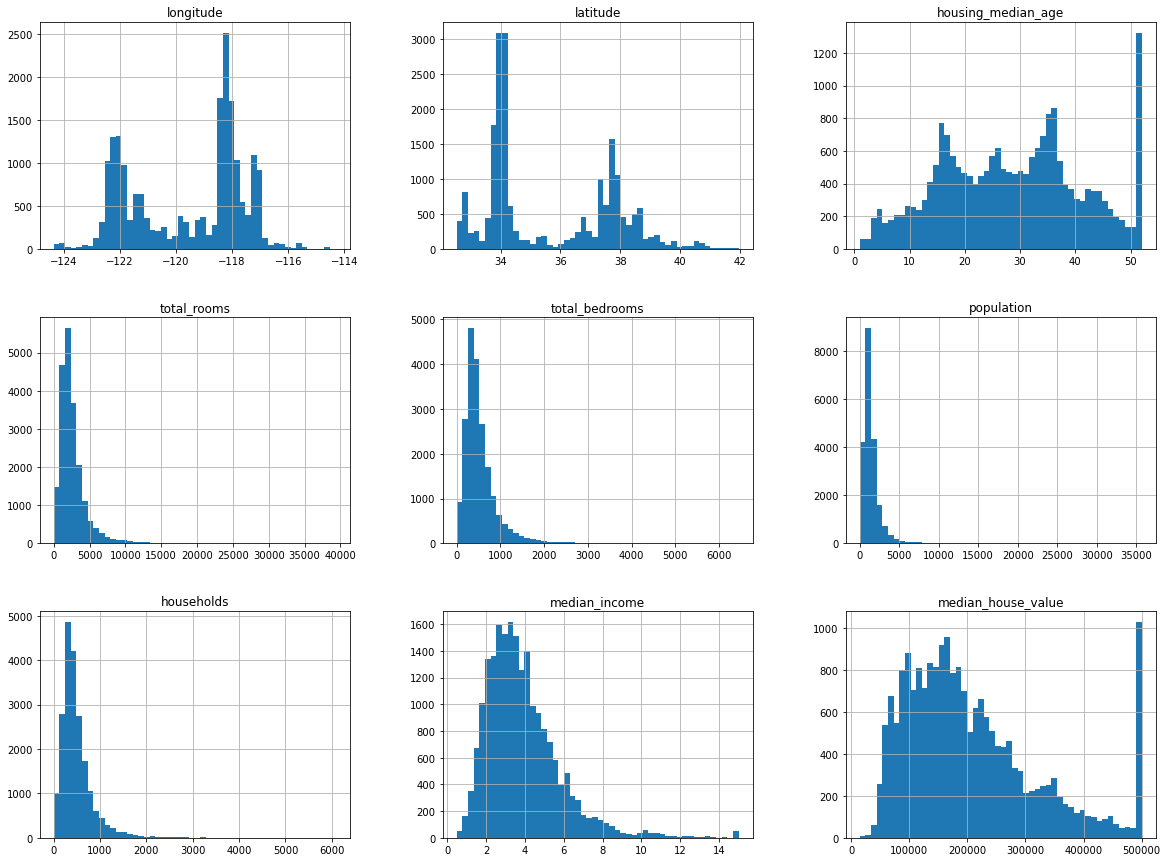

In [15]:
#visualisation
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [16]:
l=[24,23,45,12,89,78,67]
k=[2,4,7,8,10,12]
ind=np.random.permutation(k)
ind

array([10, 12,  4,  2,  8,  7])

In [17]:
# Impliment splitting of train and test data.Sckit Learn train_test_split also works like this
def split_train_test(data, test_ratio):
     np.random.seed(42)
     shuffled_indices = np.random.permutation(len(data))
     test_set_size = int(len(data) * test_ratio)
     test_indices = shuffled_indices[:test_set_size]
     train_indices = shuffled_indices[test_set_size:]
     return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


In [19]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [20]:
#Above split_train_test or sklearn's train_test_split won't retain the same test set if data increases/decreases.
# If we want to retain some of the rows of original test set,then hashing needs to be done.
# Most basic hashing function is to take modulus

import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]




In [21]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [22]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
# Stratified split for non-biased sampling.
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.093362
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.303707
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,11.000000


In [25]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0


In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.006686
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.054618
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
print(type(split))
split

<class 'sklearn.model_selection._split.StratifiedShuffleSplit'>


StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [28]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
print(strat_train_set.shape)
print(strat_test_set.shape)

(16512, 11)
(4128, 11)


In [30]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [31]:
# Discover and visualise the data
print(housing.shape)
housing = strat_train_set.copy()
print(housing.shape)

(20640, 11)
(16512, 11)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

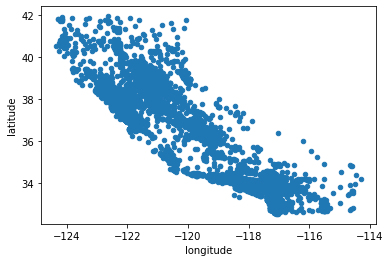

In [32]:
# visualise geographical data
housing.plot(kind="scatter", x="longitude", y="latitude")


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

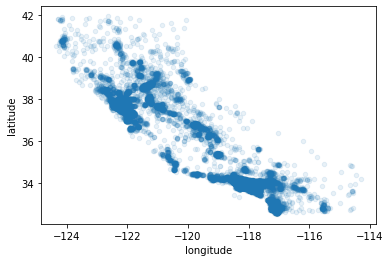

In [33]:
# setting alpha=0.1 will help in visualise the places with higher density more clearly
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

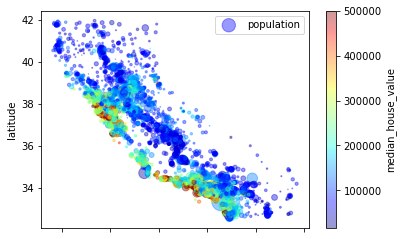

In [34]:
"""The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices)"""

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [35]:
# Looking for correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
income_cat            0.642256
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [36]:
""""The correlation coefficient only measures linear correlations (“if x
goes up, then y generally goes up/down”). It may completely miss
out on nonlinear relationships (e.g., “if x is close to zero then y gen‐
erally goes up”)."""

#scatter_matrix function:which plots every numerical attribute against every other numerical attribute.

'"The correlation coefficient only measures linear correlations (“if x\ngoes up, then y generally goes up/down”). It may completely miss\nout on nonlinear relationships (e.g., “if x is close to zero then y gen‐\nerally goes up”).'

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

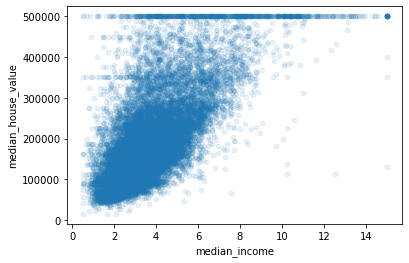

In [37]:
""""The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot (Figure 2-16):"""
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [38]:
# experimenting with attribute combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
income_cat                  0.642256
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [39]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [40]:
# Data cleaning.Filling the missing value
# Option1: • Get rid of the corresponding districts.
# Option2: • Get rid of the whole attribute.
# Option3: • Set the values to some value (zero, the mean, the median, etc.).

housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) # option 3

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [41]:
# Scikit-Learn provides a handy class to take care of missing values: Imputer. 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
print(type(imputer))

<class 'sklearn.impute._base.SimpleImputer'>


In [42]:
""""Since the median can only be computed on numerical attributes, we need to create a
copy of the data without the text attribute ocean_proximity:"""
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)

""""Now you can use this “trained” imputer to transform the training set by replacing
missing values by the learned medians:"""
X = imputer.transform(housing_num)


[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155    3.     ]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155    3.     ]


In [43]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [44]:
# Skcikit Learn Library
""""* Estimator:Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). The estimation itself is
performed by the fit() method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; 
    * Transformers:Some estimators (such as an imputer) can also transform a dataset; these are called transformers. 
    * Inspection:All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy), and all the estimator’s learned
parameters are also accessible via public instance variables with an underscore suffix (e.g., imputer.statistics_)"""

'"* Estimator:Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). The estimation itself is\nperformed by the fit() method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; \n    * Transformers:Some estimators (such as an imputer) can also transform a dataset; these are called transformers. \n    * Inspection:All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy), and all the estimator’s learned\nparameters are also accessible via public instance variables with an underscore suffix (e.g., imputer.statistics_)'

In [45]:
from sklearn import ColumnTransformer

ImportError: cannot import name 'ColumnTransformer' from 'sklearn' (C:\Users\ShefaliGupta\anaconda3\lib\site-packages\sklearn\__init__.py)